In [14]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt


In [15]:
# Function to import the dataset
def importdata():
    balance_data = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-' +
        'databases/balance-scale/balance-scale.data',
        sep=',', header=None)

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())
    
    return balance_data


In [16]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

In [17]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


In [18]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


In [19]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))


In [20]:
from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


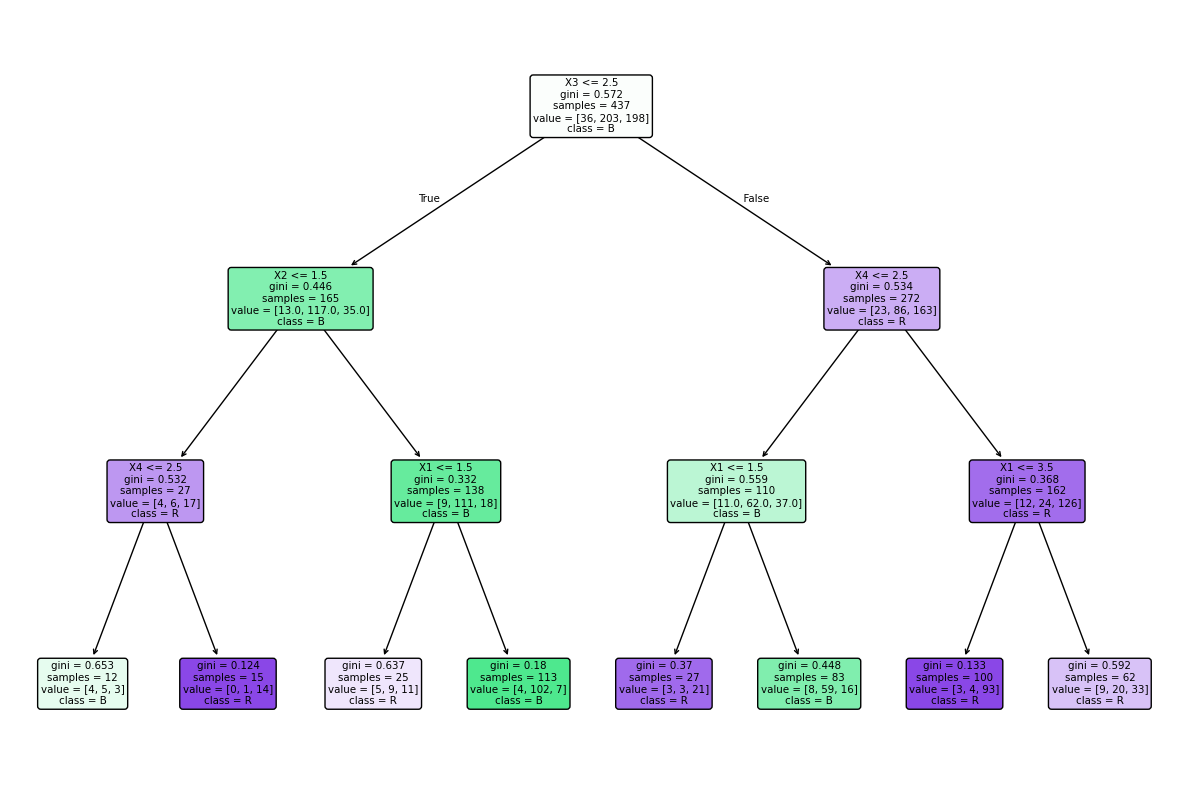

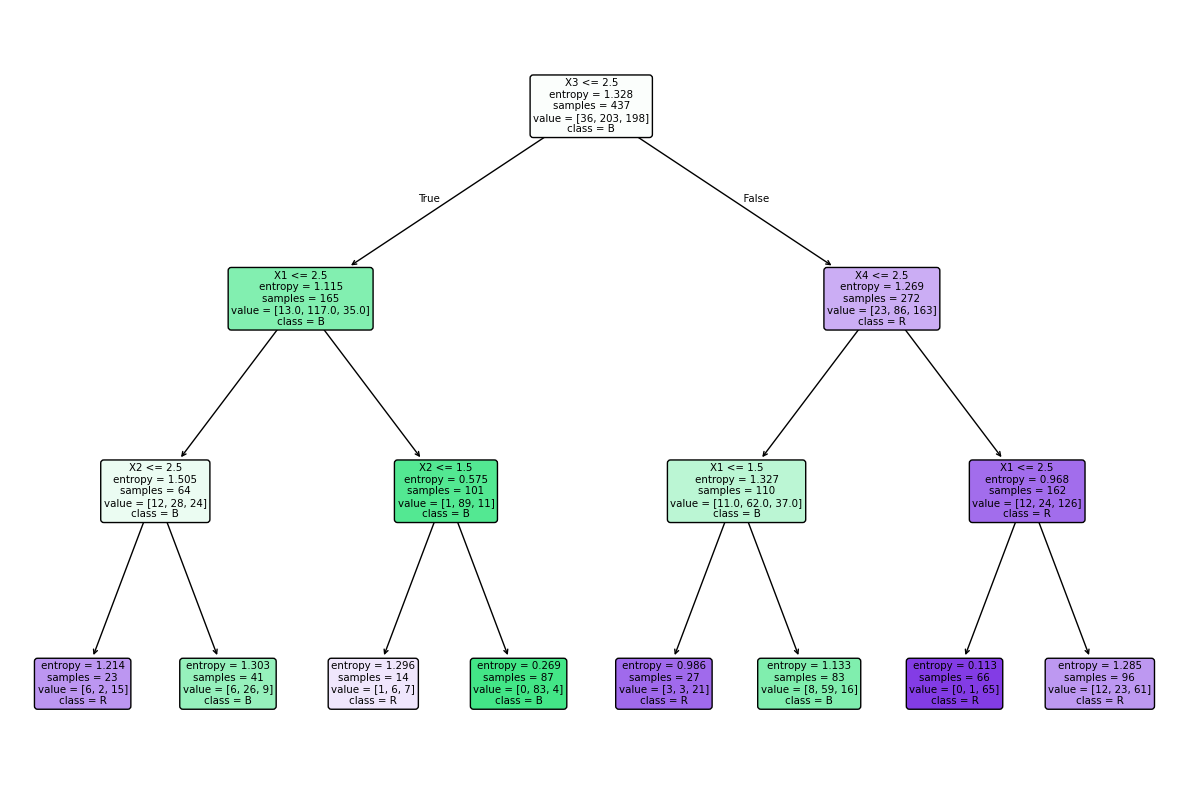

In [21]:
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])


In [22]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
print("\nAnswers obtained by Gini model:")
y_test,X_test=y_test[:5],X_test[:5]
y_pred_entropy=prediction(X_test,clf_entropy)
y_pred_gini=y_pred_gini[:5]
y_pred_entropy=y_pred_entropy[:5]
for i,j,z,k in zip(y_test,X_test, y_pred_gini,y_pred_entropy):
    for x in j:
        print(x,end="\t")
    print(i,end=" ")
    print("-",z,end=" ")
    print("-",k)


cal_accuracy(y_test, y_pred_gini)
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']

Answers obtained by Gini model:
Predicted values:
['R' 'L' 'R' 'L' 'R']
4	4	3	3	L - R - R
2	4	1	1	L - L - L
4	1	5	3	R - R - R
1	4	1	1	L - R - L
3	1	2	5	R - R - R
Confusion Matrix:  [[1 2]
 [0

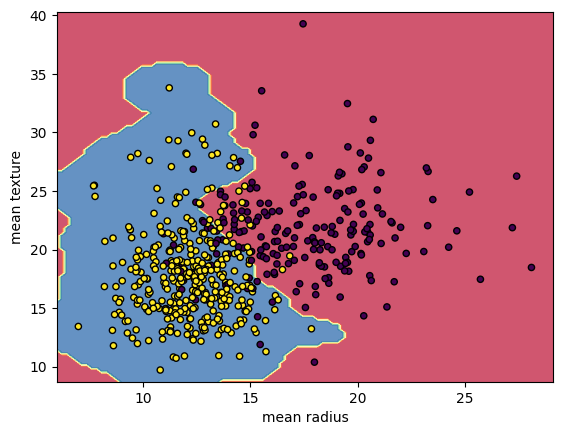

In [23]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

# Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# Train the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,  # Corrected from 's=vm' to 'svm'
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1])

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.show()


In [24]:
'

SyntaxError: unterminated string literal (detected at line 1) (544193499.py, line 1)